### Example 2.6 from Ernie Chan's *Algorithmic Trading*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

%matplotlib inline

In [2]:
start_dt = datetime.datetime(2006, 4, 26)
end_dt = datetime.datetime(2012, 4, 9)

In [3]:
import pandas.io.data as web
EWA = web.DataReader("EWA", 'yahoo', start_dt, end_dt)
EWC = web.DataReader("EWC", 'yahoo', start_dt, end_dt)

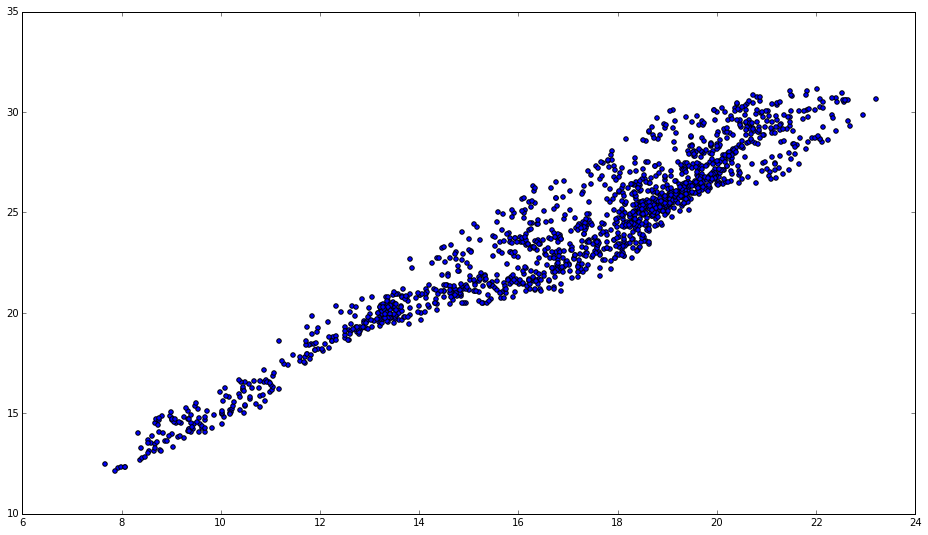

In [4]:
fig = plt.figure(figsize=(16,9))
plt.scatter(EWA['Adj Close'], EWC['Adj Close'])

In [5]:
import sklearn as skl
from sklearn.linear_model import LinearRegression

In [6]:
model = LinearRegression().fit(
    EWA['Adj Close'][:,None], 
    EWC['Adj Close'])

model.coef_

array([ 1.17738138])

In [7]:
from hedge_ratio import hedge_ratio
hedge_ratio(EWA['Adj Close'], EWC['Adj Close'], method="ols")

array([ 1.17738138])

In [8]:
sprd = EWC['Adj Close'] - model.coef_ * EWA['Adj Close']

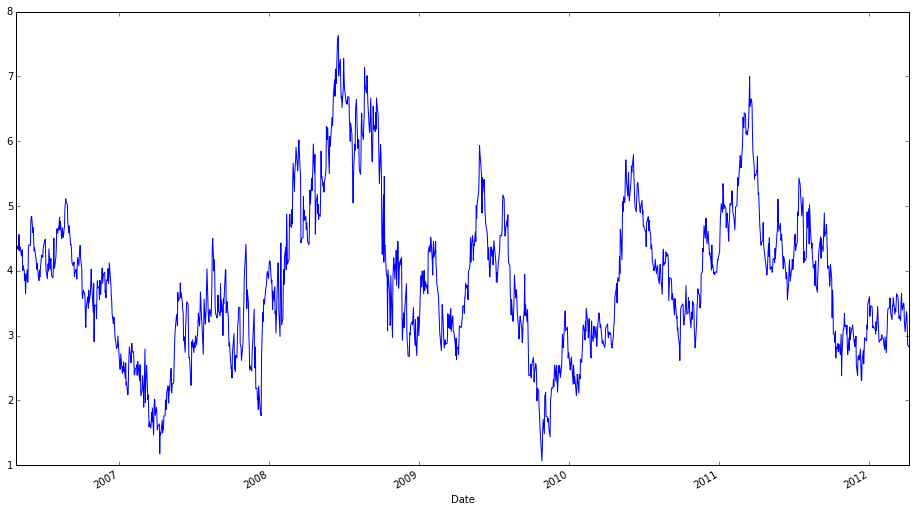

In [9]:
sprd.plot(figsize=(16,9))

In [14]:
import mean_reversion as mr
mr.halflife(sprd)

array([ 28.10927165])

In [11]:
import statsmodels.tsa.stattools as sms
adf = sms.adfuller(sprd, maxlag=1, regression="c")
print "EWA vs EWC"
print "Test statistic: %f, pValue: %f" % adf[0:2]

EWA vs EWC
Test statistic: -3.637472, pValue: 0.005084


In [17]:
cadf = mr.cadf(EWA['Adj Close'], EWC['Adj Close'])
print "Test statistic: %f, pValue: %f" % cadf[0:2]

Test statistic: -3.637472, pValue: 0.005084


In [19]:
cadf_tls = mr.cadf(EWA['Adj Close'], EWC['Adj Close'], method="tls")
print "Test statistic: %f, pValue: %f" % cadf_tls[0:2]

Test statistic: -3.666677, pValue: 0.004607
